In [ ]:
# import directories
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn import metrics


In [ ]:
#Loading the file
df=pd.read_csv('Advertising.csv')


DATA WRANGLING

In [ ]:
df.head(6)


,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2


In [ ]:
df.describe()


,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [ ]:
df.shape


(200, 5)

In [ ]:
df.ndim

2

In [ ]:
df.size

1000

In [ ]:
pd.DataFrame(df.isnull().sum(),columns =["Count of Null Values"]).T

,Unnamed: 0,TV,Radio,Newspaper,Sales
Count of Null Values,0,0,0,0,0


In [ ]:
a = df["Newspaper"]
a1 = df["Radio"]
a2 = df['TV']
b = df["Sales"]


<Axes: xlabel='Newspaper', ylabel='Sales'>

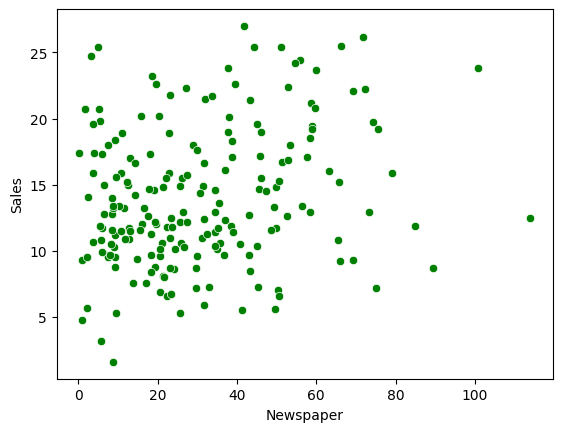

In [ ]:
sns.scatterplot(x=a,y=b,color='green')

<Axes: xlabel='Radio', ylabel='Sales'>

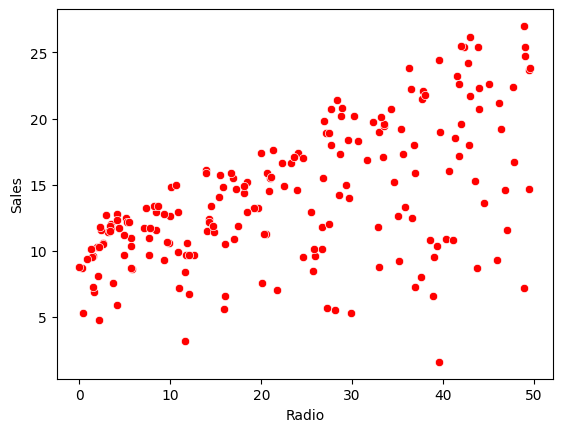

In [ ]:
sns.scatterplot(x=a1,y=b,color='red')

<Axes: xlabel='TV', ylabel='Sales'>

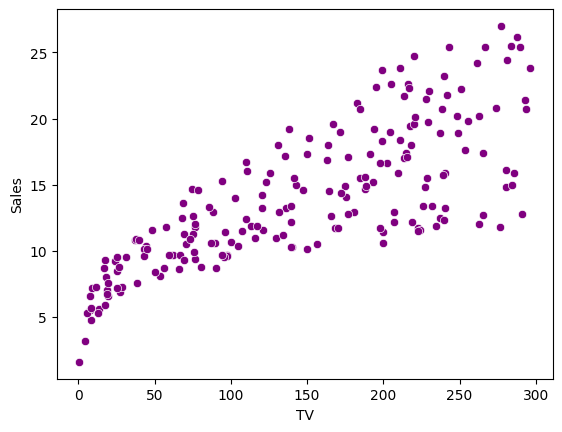

In [ ]:
sns.scatterplot(x=a2,y=b,color='purple')

<ipython-input-20-1f6a532580d6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['TV'])


<Axes: xlabel='TV', ylabel='Density'>

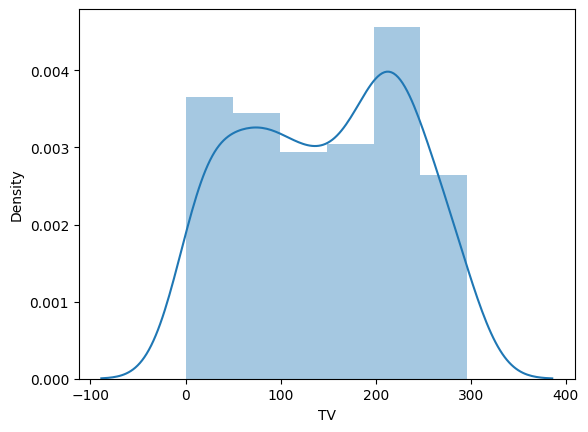

In [ ]:
sns.distplot(df['TV'])

<ipython-input-21-6a0fc54c08d4>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Radio'])


<Axes: xlabel='Radio', ylabel='Density'>

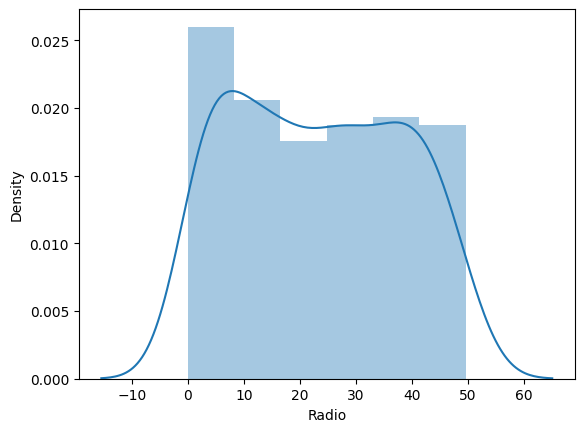

In [ ]:
sns.distplot(df['Radio'])


<ipython-input-22-6fe4fcc6000a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Newspaper'])


<Axes: xlabel='Newspaper', ylabel='Density'>

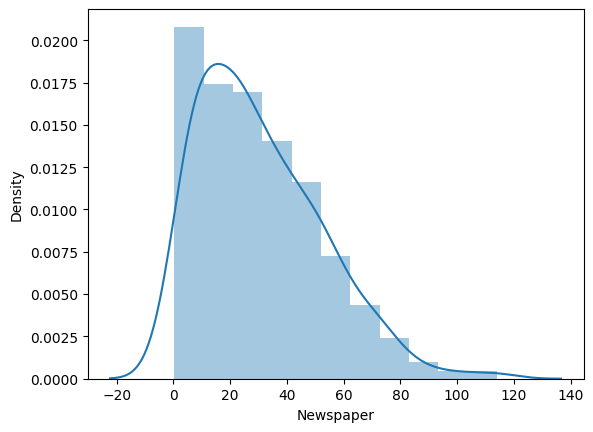

In [ ]:
sns.distplot(df['Newspaper'])


<ipython-input-23-527cbf673b18>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df)


<Axes: ylabel='Density'>

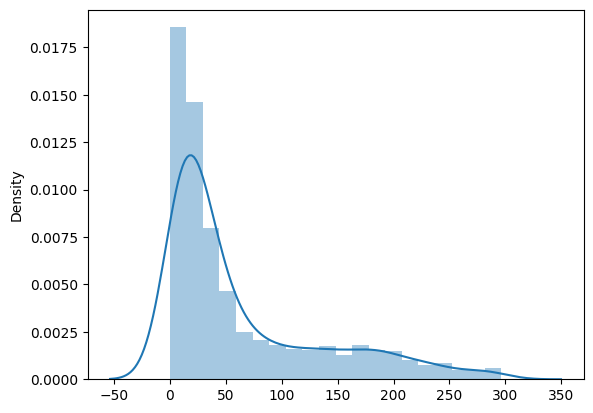

In [ ]:
sns.distplot(df)


<Axes: xlabel='Newspaper', ylabel='Count'>

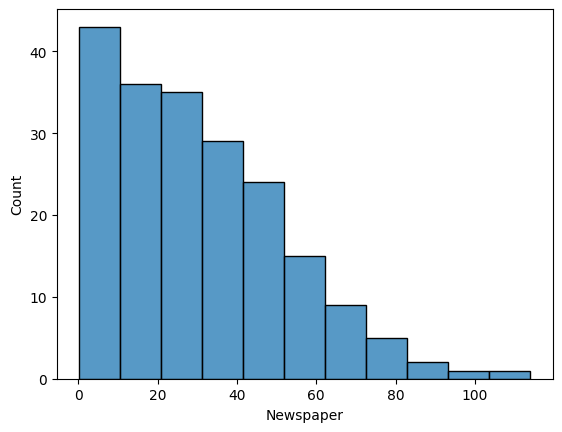

In [ ]:
sns.histplot(df['Newspaper'])


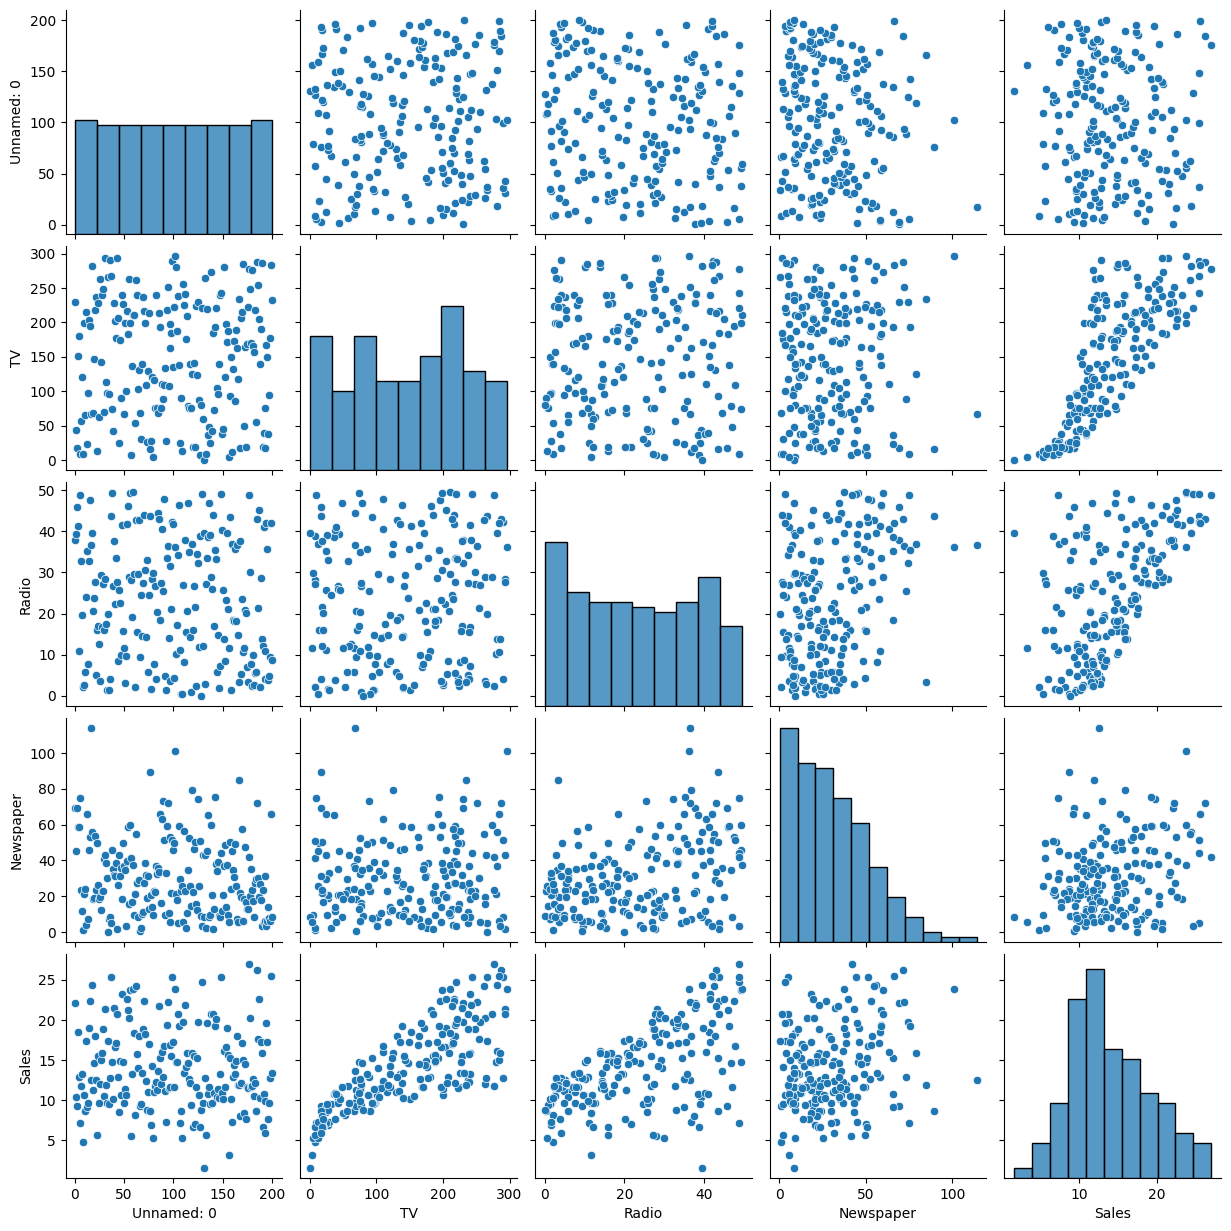

In [ ]:
sns.pairplot(df)


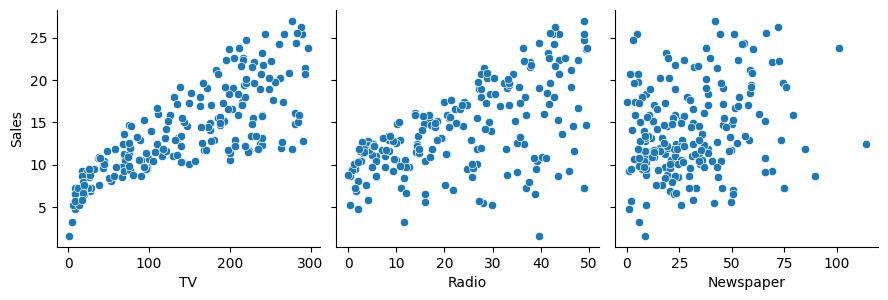

In [ ]:
sns.pairplot(df,x_vars=['TV','Radio','Newspaper'],y_vars=['Sales'],height=3,aspect=1)
plt.show()

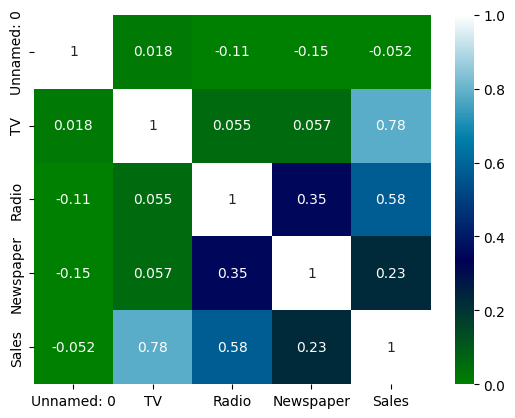

In [ ]:
sns.heatmap(df.corr(),annot=True,vmin=0,vmax=1,cmap='ocean')
plt.show()

In [ ]:
df.corr()

,Unnamed: 0,TV,Radio,Newspaper,Sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
Radio,-0.110680,0.054809,1.000000,0.354104,0.576223
Newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
Sales,-0.051616,0.782224,0.576223,0.228299,1.000000


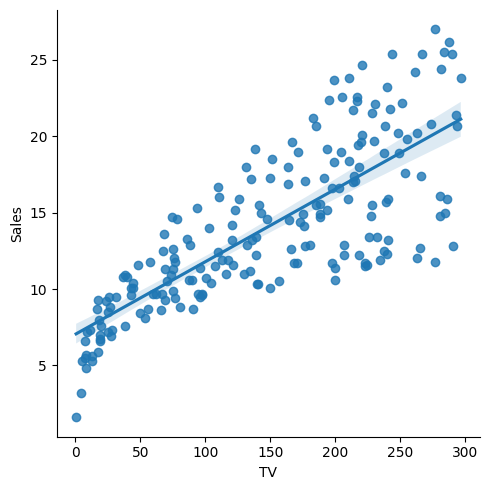

In [ ]:
sns.lmplot(x='TV',y='Sales', data=df)

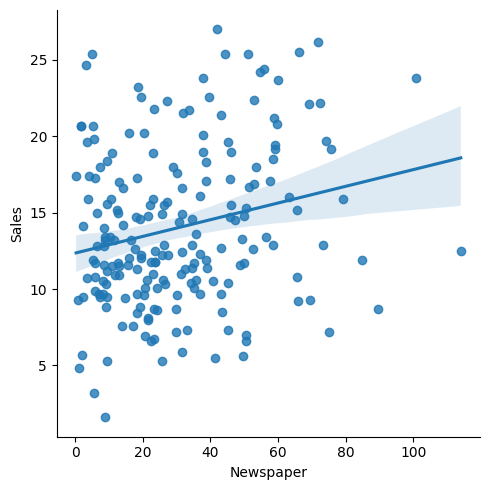

In [ ]:
sns.lmplot(x='Newspaper',y='Sales', data=df)

In [ ]:
X = df[['TV', 'Newspaper', 'Radio']]
Y = df[['Sales']]


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size=0.8,random_state=50)

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [ ]:
lr.intercept_


array([2.64390117])

In [ ]:
lr.coef_

array([[0.04699945, 0.00345459, 0.18706503]])

In [ ]:
lr.score(X_train,Y_train)


0.9013713199191987

In [ ]:
Y_pred = lr.predict(X_test)
Y_pred

array([[13.7907978 ],
       [14.59424374],
       [10.55612822],
       [ 9.90002998],
       [10.06819472],
       [18.27475851],
       [15.19128878],
       [ 3.44438763],
       [20.52267528],
       [11.81767822],
       [14.80881144],
       [12.72461879],
       [21.13950252],
       [14.24324005],
       [15.72214994],
       [16.95740482],
       [10.07042002],
       [16.62578593],
       [ 9.58068105],
       [12.39525472],
       [16.92371559],
       [10.09265438],
       [ 7.99220556],
       [13.77785614],
       [21.12007031],
       [14.30604103],
       [ 7.02891791],
       [ 7.429204  ],
       [15.33846692],
       [13.40314562],
       [14.94482091],
       [10.01155059],
       [11.92177411],
       [16.33866375],
       [ 6.43543949],
       [ 9.64221908],
       [13.03688854],
       [20.4330587 ],
       [ 9.03909486],
       [11.30633312]])

In [ ]:
#Evaluation Metrics
mae = metrics.mean_absolute_error(Y_test,Y_pred)
mse = metrics.mean_squared_error(Y_test,Y_pred)

In [ ]:
print(mae)

1.1341870834106142


In [ ]:
mse

2.1705451765348363

<Axes: xlabel='Sales'>

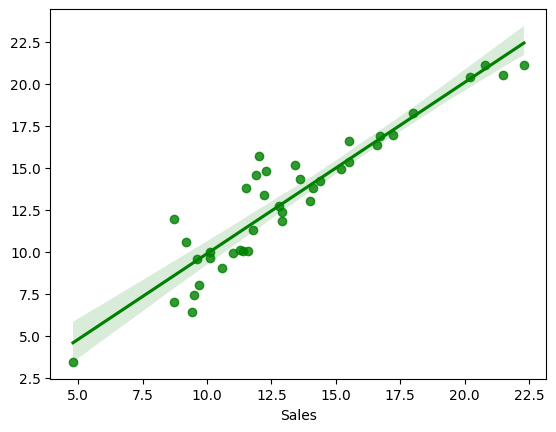

In [ ]:
sns.regplot(x=Y_test, y=Y_pred,color='green')
